In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import wrangle, explore, acquire, evaluate, prepare
import matplotlib.pyplot as plt
import pydataset as data
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
diamonds_df = sns.load_dataset('diamonds')

In [4]:
diamonds_df = diamonds_df.rename(columns = {'x' : 'length', 'y' : 'width', 'z' : 'height'})

In [6]:
diamonds_df

,carat,cut,color,clarity,depth,table,price,length,width,height,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [7]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   length   53940 non-null  float64 
 8   width    53940 non-null  float64 
 9   height   53940 non-null  float64 
 10  volume   53940 non-null  float64 
dtypes: category(3), float64(7), int64(1)
memory usage: 3.4 MB


In [8]:
diamonds_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40000,0.700000,1.040000,5.01000
depth,53940.0,61.749405,1.432621,43.0,61.00000,61.800000,62.500000,79.00000
table,53940.0,57.457184,2.234491,43.0,56.00000,57.000000,59.000000,95.00000
price,53940.0,3932.799722,3989.439738,326.0,950.00000,2401.000000,5324.250000,18823.00000
length,53940.0,5.731157,1.121761,0.0,4.71000,5.700000,6.540000,10.74000
width,53940.0,5.734526,1.142135,0.0,4.72000,5.710000,6.540000,58.90000
height,53940.0,3.538734,0.705699,0.0,2.91000,3.530000,4.040000,31.80000
volume,53940.0,129.849403,78.245262,0.0,65.13683,114.808572,170.842451,3840.59806


In [9]:
dnum_df = wrangle.encode_values(diamonds_df)

In [10]:
dnum_df

,carat,cut,color,clarity,depth,table,price,length,width,height,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [11]:
dnum_df = dnum_df.dropna()
dnum_df = dnum_df.drop_duplicates()

In [12]:
dnum_df.shape

(53794, 11)

In [13]:
train, validate, test = prepare.train_validate_test_split(dnum_df)

In [14]:
train

,carat,cut,color,clarity,depth,table,price,length,width,height,volume
45962,0.24,2,1,7,61.3,57.0,526,4.00,4.02,2.46,39.556800
47703,0.58,2,3,4,62.6,54.0,1884,5.30,5.34,3.33,94.245660
38085,0.30,2,1,7,61.8,56.0,1013,4.35,4.33,2.68,50.479140
11300,1.54,3,4,0,62.0,60.0,4980,7.32,7.40,4.56,247.006080
6124,0.90,3,3,2,62.2,60.0,3984,6.14,6.07,3.80,141.625240
...,...,...,...,...,...,...,...,...,...,...,...
22481,1.24,3,3,1,60.5,60.0,10508,6.95,6.91,4.19,201.222655
8980,1.06,4,5,2,60.2,59.0,4507,6.62,6.67,4.00,176.621600
5992,1.16,2,6,2,60.7,57.0,3955,6.77,6.83,4.13,190.967483
9969,1.14,1,5,2,63.5,56.0,4702,6.58,6.62,4.19,182.514724


In [15]:
X_train = train.drop(columns = 'price')
y_train = train['price']
X_validate = validate.drop(columns = 'price')
y_validate = validate['price']
X_test = test.drop(columns = 'price')
y_test = test['price']

In [16]:
X_train_scaled = wrangle.minmax_scale(X_train, X_train)
X_validate_scaled = wrangle.minmax_scale(X_validate, X_train)
X_test_scaled = wrangle.minmax_scale(X_test, X_train)

In [17]:
explore.select_kbest(X_train_scaled, y_train, k = 7)

The best features are:['carat', 'color', 'table', 'length', 'width', 'height', 'volume']


In [18]:
explore.rfe(X_train_scaled, y_train, k = 7, )

Best features are ['carat', 'depth', 'table', 'length', 'width', 'height', 'volume']


<AxesSubplot:>

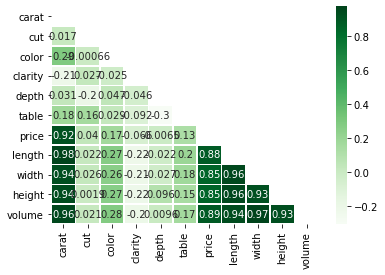

In [19]:
explore.heat_corr(train)

(array([14168.,  5214.,  4122.,  2183.,  1268.,   968.,   734.,   568.,
          484.,   415.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

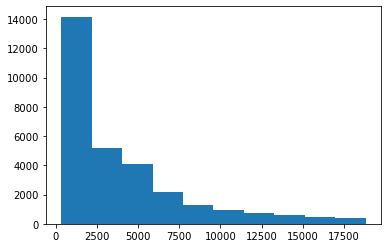

In [20]:
plt.hist(y_train)

In [21]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [22]:
y_train['pred_mean'] = y_train['price'].mean()

In [23]:
y_validate['pred_mean'] = y_train['price'].mean()

In [24]:
y_train['pred_med'] = y_train['price'].median()

In [25]:
y_validate['pred_med'] = y_train['price'].median()

In [26]:
y_train

,price,pred_mean,pred_med
45962,526,3930.217601,2390.0
47703,1884,3930.217601,2390.0
38085,1013,3930.217601,2390.0
11300,4980,3930.217601,2390.0
6124,3984,3930.217601,2390.0
...,...,...,...
22481,10508,3930.217601,2390.0
8980,4507,3930.217601,2390.0
5992,3955,3930.217601,2390.0
9969,4702,3930.217601,2390.0


In [27]:
# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.price, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.price, y_train.pred_med)**(1/2)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_med)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  3997.8 
Validate/Out-of-Sample:  3929.56
RMSE using Median
Train/In-Sample:  4284.23 
Validate/Out-of-Sample:  4209.12


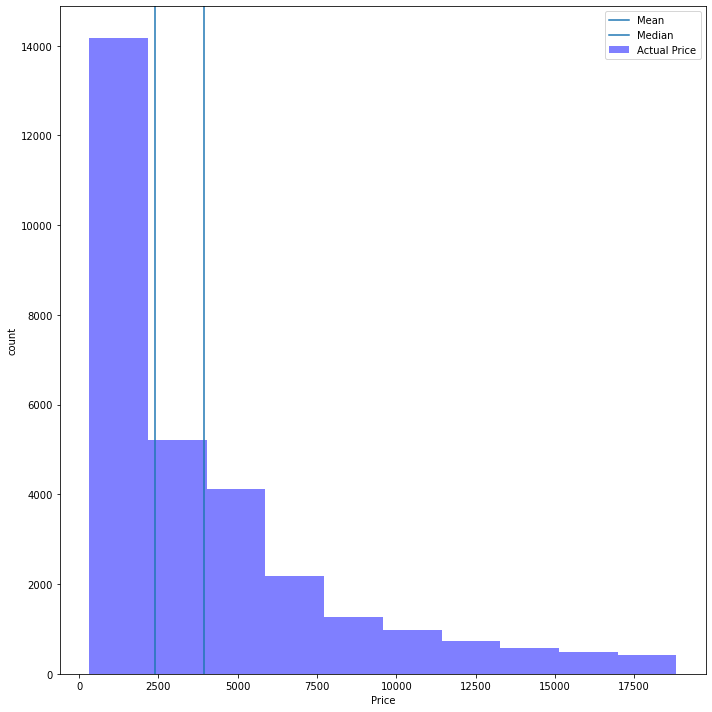

In [28]:
plt.figure(figsize =(10,10))
plt.hist(y_train.price, color='blue', alpha=.5, label="Actual Price")
plt.axvline(x=y_train.price.mean(), ymin=0, ymax=1, label = 'Mean')
plt.axvline(x=y_train.price.median(), ymin=0, ymax=1, label = 'Median')
plt.xlabel("Price")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
lm = LinearRegression(normalize=True)

lm.fit(X_train_scaled, y_train.price)
y_train['pred_lm'] = lm.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.price, y_train.pred_lm)**(1/2)

y_validate['pred_lm'] = lm.predict(X_validate_scaled)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1343.750675843943 
Validation/Out-of-Sample:  1330.2303064805358


In [30]:
lars = LassoLars(alpha=1.0)
lars.fit(X_train_scaled, y_train.price)
y_train['pred_lars'] = lars.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.price, y_train.pred_lars)**(1/2)
y_validate['pred_lars'] = lars.predict(X_validate_scaled)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1444.2140307858544 
Validation/Out-of-Sample:  1409.933794207559


In [31]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train, y_train.price)

# predict train
y_train['pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.pred_glm)**(1/2)

# predict validate
y_validate['pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  3997.796104209439 
Validation/Out-of-Sample:  3929.5550341441995


In [32]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [33]:
# create the model object
lm2 = LinearRegression(normalize=True)

lm2.fit(X_train_degree2, y_train.price)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.pred_lm2)**(1/2)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1022.171817320172 
Validation/Out-of-Sample:  1086.350519314566


In [34]:
y_validate

,price,pred_mean,pred_med,pred_lm,pred_lars,pred_glm,pred_lm2
37127,971,3930.217601,2390.0,1047.908984,894.409216,3930.217601,889.690949
19344,8044,3930.217601,2390.0,9237.545514,9217.259514,3930.217601,9377.890507
17625,7098,3930.217601,2390.0,6074.589937,5848.893857,3930.217601,6340.616236
26018,645,3930.217601,2390.0,38.906083,388.713515,3930.217601,10.734049
13449,5522,3930.217601,2390.0,4690.871235,5153.904158,3930.217601,4715.930606
...,...,...,...,...,...,...,...
23445,11435,3930.217601,2390.0,9895.702908,9479.758151,3930.217601,11229.670987
48332,1959,3930.217601,2390.0,2539.801767,2506.061170,3930.217601,2059.177593
38586,1036,3930.217601,2390.0,1913.122511,1452.633366,3930.217601,1566.695683
28292,432,3930.217601,2390.0,-705.205241,-580.968691,3930.217601,456.822486


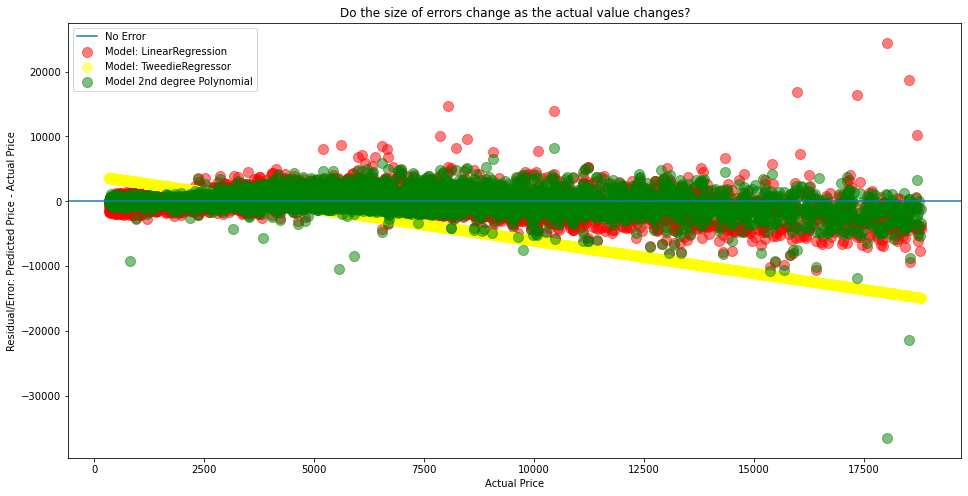

In [35]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.price, y_validate.pred_lm-y_validate.price, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.price, y_validate.pred_glm-y_validate.price, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.price, y_validate.pred_lm2-y_validate.price, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Residual/Error: Predicted Price - Actual Price")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

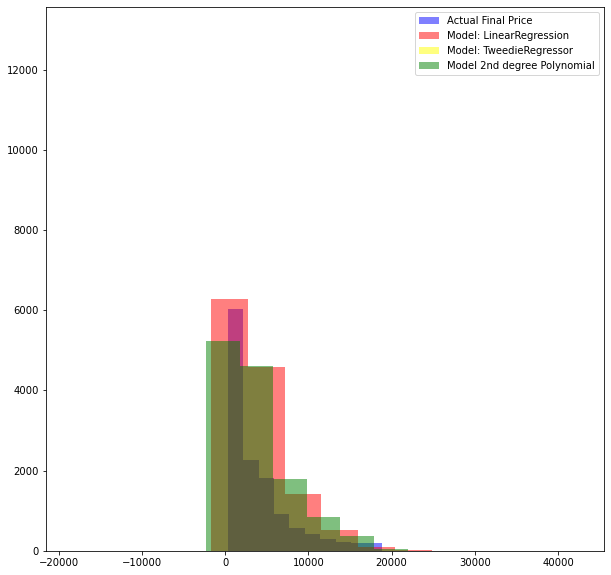

In [36]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(10,10))
plt.hist(y_validate.price, color='blue', alpha=.5, label="Actual Final Price")
plt.hist(y_validate.pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.legend()
plt.show()

In [37]:
y_test = pd.DataFrame(y_test)
y_test['pred_lm2'] = lm2.predict(X_test_degree2)
rmse_test = mean_squared_error(y_test.price, y_test.pred_lm2)**(1/2)
print("RMSE for polynomial model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)


RMSE for polynomial model using LinearRegression
Out-of-Sample Performance:  1116.680093036342


In [38]:
mean_squared_error(y_test.price, y_test.pred_lm2)**(1/2)

1116.680093036342

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test.price, y_test.pred_lm2)

0.9232197713755885

In [40]:
y_test['pred_lm2'] = y_test.pred_lm2.round(2)

In [41]:
y_test['baseline'] = y_test.price.mean()

In [42]:
y_test

,price,pred_lm2,baseline
31935,776,695.85,3982.249373
28669,678,663.20,3982.249373
19766,8334,9072.36,3982.249373
36165,929,917.68,3982.249373
34076,852,843.70,3982.249373
...,...,...,...
45143,1654,1710.01,3982.249373
3213,3348,3311.77,3982.249373
10673,4840,5046.81,3982.249373
16656,6660,6600.98,3982.249373


In [43]:
evaluate.better_than_baseline(y_validate['price'], y_validate['pred_lm2'])

,metric,model_error,base_error,model_efficacy
0,SSE,1.523701e+10,1.993511e+11,True
1,MSE,1.180157e+06,1.544041e+07,True
2,RMSE,1.086351e+03,3.929429e+03,True


In [44]:
## Now with features

In [58]:
diamonds_df = diamonds_df.rename(columns = {'x' : 'length', 'y' : 'width', 'z' : 'height'})

In [59]:
diamonds_df['volume'] = diamonds_df['height'] * diamonds_df['width'] * diamonds_df['length']
dnum_df = wrangle.encode_values(diamonds_df)
dnum_df = dnum_df.dropna()
dnum_df = dnum_df.drop_duplicates()
dnum_df['volume'] = dnum_df['height'] * dnum_df['width'] * dnum_df['length']
train, validate, test = prepare.train_validate_test_split(dnum_df)

In [60]:
X_train = train[['carat','color','table','volume']]
y_train = train['price']
X_validate = validate[['carat','color','table','volume']]
y_validate = validate['price']
X_test = test[['carat','color','table','volume']]
y_test = test['price']

In [61]:
X_train_scaled = wrangle.minmax_scale(X_train, X_train)
X_validate_scaled = wrangle.minmax_scale(X_validate, X_train)
X_test_scaled = wrangle.minmax_scale(X_test, X_train)

In [62]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [63]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [64]:
lm = LinearRegression(normalize=True)

lm.fit(X_train_scaled, y_train.price)
y_train['pred_lm'] = lm.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.price, y_train.pred_lm)**(1/2)

y_validate['pred_lm'] = lm.predict(X_validate_scaled)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1486.0586659811347 
Validation/Out-of-Sample:  1455.582282654617


In [65]:
lars = LassoLars(alpha=1.0)
lars.fit(X_train_scaled, y_train.price)
y_train['pred_lars'] = lars.predict(X_train_scaled)
rmse_train = mean_squared_error(y_train.price, y_train.pred_lars)**(1/2)
y_validate['pred_lars'] = lars.predict(X_validate_scaled)
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1525.1786614465075 
Validation/Out-of-Sample:  1486.223884496496


In [66]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train, y_train.price)

# predict train
y_train['pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.pred_glm)**(1/2)

# predict validate
y_validate['pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  3997.796104209439 
Validation/Out-of-Sample:  3929.5550341441995


In [67]:
# create the model object
lm2 = LinearRegression(normalize=True)

lm2.fit(X_train_degree2, y_train.price)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.pred_lm2)**(1/2)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1409.8279068655943 
Validation/Out-of-Sample:  1414.9425178692145


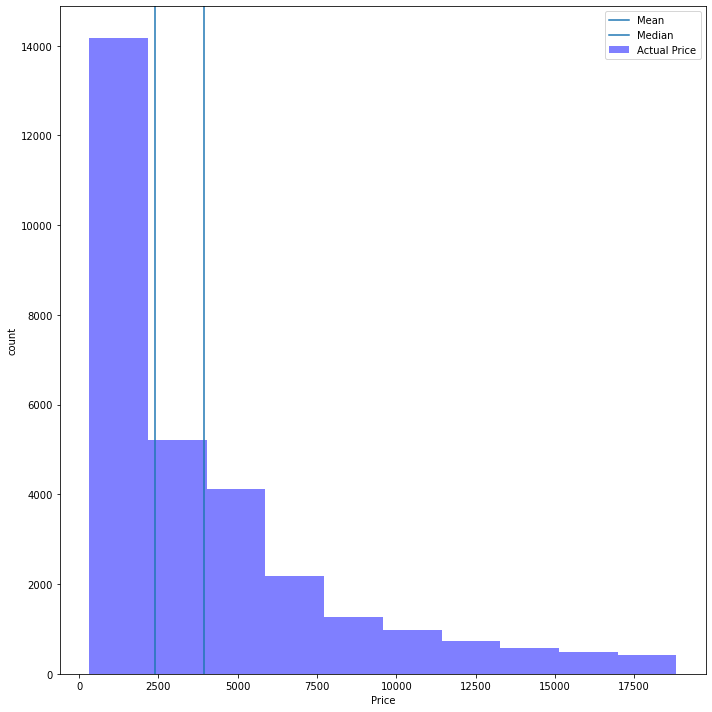

In [68]:
plt.figure(figsize =(10,10))
plt.hist(y_train.price, color='blue', alpha=.5, label="Actual Price")
plt.axvline(x=y_train.price.mean(), ymin=0, ymax=1, label = 'Mean')
plt.axvline(x=y_train.price.median(), ymin=0, ymax=1, label = 'Median')
plt.xlabel("Price")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
plt.show()

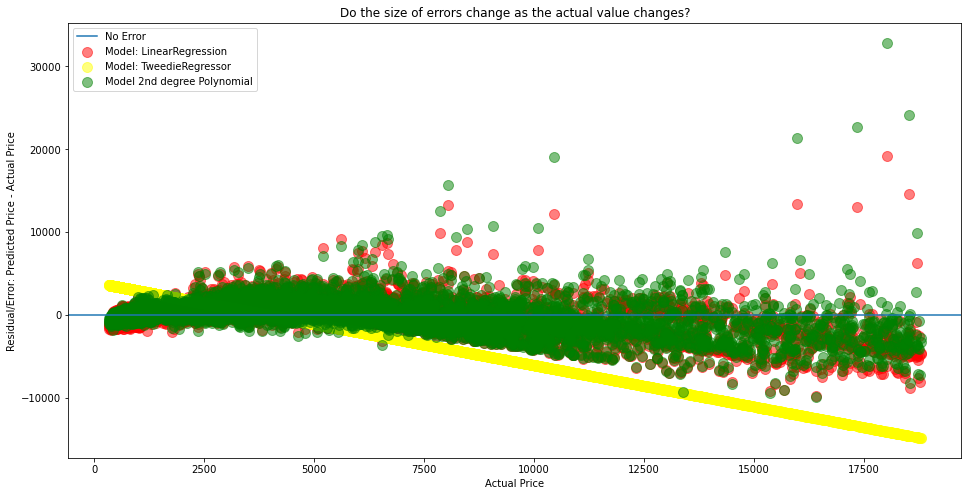

In [69]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.price, y_validate.pred_lm-y_validate.price, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.price, y_validate.pred_glm-y_validate.price, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.price, y_validate.pred_lm2-y_validate.price, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Residual/Error: Predicted Price - Actual Price")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

In [70]:
y_validate

,price,pred_lm,pred_lars,pred_glm,pred_lm2
37127,971,885.467803,921.020122,3930.217601,1052.346317
19344,8044,9503.108535,9091.318751,3930.217601,9393.860673
17625,7098,5845.714212,5595.571896,3930.217601,5872.165949
26018,645,64.483598,447.572151,3930.217601,-119.428266
13449,5522,5438.698329,5473.022262,3930.217601,5260.591583
...,...,...,...,...,...
23445,11435,9417.858405,9165.969760,3930.217601,9300.800852
48332,1959,3333.142021,2854.875874,3930.217601,2829.841539
38586,1036,983.808844,921.057836,3930.217601,1082.509566
28292,432,-1074.095868,-508.675596,3930.217601,-368.302581


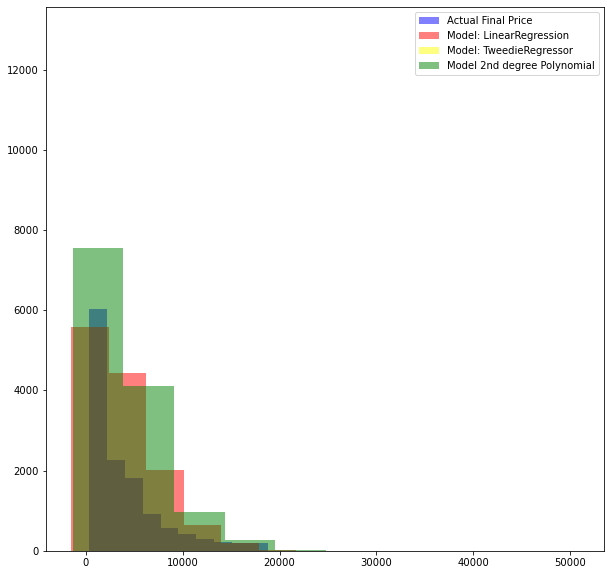

In [71]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(10,10))
plt.hist(y_validate.price, color='blue', alpha=.5, label="Actual Final Price")
plt.hist(y_validate.pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.legend()
plt.show()

In [72]:
y_test = pd.DataFrame(y_test)
y_test['pred_lm2'] = lm2.predict(X_test_degree2)
rmse_test = mean_squared_error(y_test.price, y_test.pred_lm2)**(1/2)
print("RMSE for polynomial model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for polynomial model using LinearRegression
Out-of-Sample Performance:  1458.1890783169226
